In [0]:
import pickle
import tensorflow as tf
import librosa
import numpy as np
import itertools
from itertools import combinations
import random
import matplotlib.pyplot as plt
#Discussed with Shivani Firodiya

In [0]:
with open('hw4_tr7.pkl','rb') as f:
  train_data = pickle.load(f)

In [0]:
with open('hw4_te7.pkl','rb') as f:
  test_data = pickle.load(f)

In [0]:
X = tf.placeholder(tf.float32, [None,28,28])
Y = tf.placeholder(tf.float32, [None, 28,28])

In [0]:
def encoder(X):
  X=tf.reshape(X,[-1,28,28,1])
  conv1 = tf.layers.conv2d(inputs=X,filters=16,kernel_size=[4, 4],padding="same",activation=tf.nn.relu,kernel_initializer=tf.contrib.layers.xavier_initializer())
  maxpool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=4)

  conv2 = tf.layers.conv2d(inputs=maxpool1,filters=32,kernel_size=[2,2],padding="same",activation=tf.nn.relu,kernel_initializer=tf.contrib.layers.xavier_initializer())
  maxpool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=4)
 
  flat = tf.layers.flatten(maxpool2)
  
  fc1 = tf.layers.dense(inputs=flat,units=784,activation=tf.nn.relu,kernel_initializer=tf.contrib.layers.xavier_initializer())
  output=tf.layers.dense(inputs=fc1,units=6,kernel_initializer=tf.contrib.layers.xavier_initializer())
  
  return output[:,:3],output[:,3:]

In [0]:
def decoder(latentvector):
  flat = tf.layers.dense(inputs=latentvector,units=12544,activation=tf.nn.relu)
  flat_reshape =  tf.reshape(flat,[-1,112,112,1])
  
  conv2 = tf.layers.conv2d(inputs=flat_reshape,filters=32,kernel_size=[4,4],padding="same",activation=tf.nn.relu,kernel_initializer=tf.contrib.layers.xavier_initializer())
  maxpool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
  
  conv1 = tf.layers.conv2d(inputs=maxpool2,filters=1,kernel_size=[2,2],padding="same",kernel_initializer=tf.contrib.layers.xavier_initializer())
  maxpool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  return maxpool1

In [7]:
mu, log_sigma_sq = encoder(X)
e =tf.random_normal(shape=tf.shape(mu),dtype=tf.float32)
sigma = tf.exp(0.5* log_sigma_sq)
latentvector  = mu + e*sigma

logits = decoder(latentvector)
logits =tf.reshape(logits,(-1,28,28))

decoded_output = tf.sigmoid(logits)
decoded_output = tf.reshape(decoded_output,[-1,28,28])


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.


In [0]:
cross_entropy_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits))
latent_loss = 0.5 * tf.reduce_sum(tf.exp(log_sigma_sq) + tf.square(mu) - 1 -log_sigma_sq)
loss =cross_entropy_loss + latent_loss
train_step = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)

sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

In [9]:
n_input = train_data.shape[0]
batch_size = 50


reshaped_train_data = np.reshape(train_data , (n_input , 28 , 28))
for i in range(500):
  for j in range((int)(n_input/batch_size)):
    
    batch_x = reshaped_train_data[ (j*batch_size):(j+1)*batch_size,:]
    batch_y = reshaped_train_data[ (j*batch_size):(j+1)*batch_size,: ]
    train_step.run(feed_dict={X: batch_x, Y: batch_y})
    
  if i % 10 == 0:    
    print("Epoch: ",i)
    print("Loss: ",loss.eval(feed_dict={X: batch_x, Y: batch_y}))

Epoch:  0
Loss:  24424.727
Epoch:  10
Loss:  9048.542
Epoch:  20
Loss:  7821.9707
Epoch:  30
Loss:  7478.1216
Epoch:  40
Loss:  7291.602
Epoch:  50
Loss:  7157.376
Epoch:  60
Loss:  7089.182
Epoch:  70
Loss:  6997.567
Epoch:  80
Loss:  6966.889
Epoch:  90
Loss:  6858.553
Epoch:  100
Loss:  6801.195
Epoch:  110
Loss:  6736.877
Epoch:  120
Loss:  6690.604
Epoch:  130
Loss:  6665.1904
Epoch:  140
Loss:  6596.392
Epoch:  150
Loss:  6538.715
Epoch:  160
Loss:  6517.515
Epoch:  170
Loss:  6471.3965
Epoch:  180
Loss:  6409.993
Epoch:  190
Loss:  6410.3213
Epoch:  200
Loss:  6380.261
Epoch:  210
Loss:  6343.8345
Epoch:  220
Loss:  6362.085
Epoch:  230
Loss:  6333.863
Epoch:  240
Loss:  6329.513
Epoch:  250
Loss:  6300.0493
Epoch:  260
Loss:  6271.194
Epoch:  270
Loss:  6261.5312
Epoch:  280
Loss:  6261.236
Epoch:  290
Loss:  6262.117
Epoch:  300
Loss:  6240.8804
Epoch:  310
Loss:  6275.8975
Epoch:  320
Loss:  6203.174
Epoch:  330
Loss:  6227.217
Epoch:  340
Loss:  6199.2114
Epoch:  350
Loss:  

In [0]:
r = np.random.normal(size = [200,1]) 
c = np.random.normal(size=[1,3]) 
c = np.repeat(c, 200 ,axis =0) 

In [0]:
e1 = np.concatenate((r[:,:1],c[: , 1:]),axis = 1)
e2 = np.concatenate((c[:,:1],r[:,:1],c[:,1:2]),axis = 1)
e3 = np.concatenate((c[: , 0:2],r[:,:1]),axis = 1)

In [0]:
first = decoded_output.eval(feed_dict={latentvector: e1})
second = decoded_output.eval(feed_dict={latentvector: e2})
third = decoded_output.eval(feed_dict={latentvector: e3})

In [0]:
def plotdata(img, size):
  fig, axes = plt.subplots(size, size)
  
  for i in range(size):
    for j in range(size):
      axes[i, j].imshow(img[i*j], cmap='gray')
      axes[i,j].axis('off')

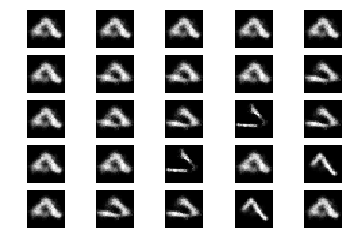

In [14]:
plotdata(first,5)

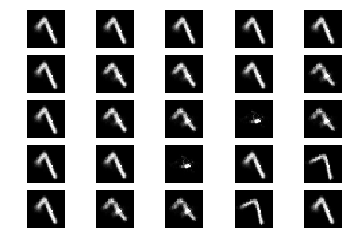

In [15]:
plotdata(second,5)

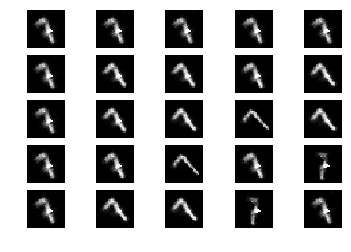

In [16]:
plotdata(third,5)

In [0]:
pred_1 = decoded_output.eval(feed_dict={X:test_data,latentvector: e1})
pred_2 = decoded_output.eval(feed_dict={X:test_data,latentvector: e2})
pred_3 = decoded_output.eval(feed_dict={X:test_data,latentvector: e3})

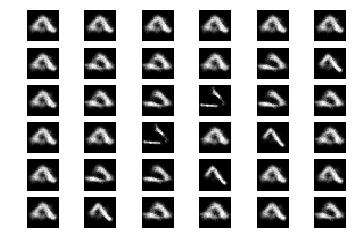

In [18]:
plotdata(pred_1,6)

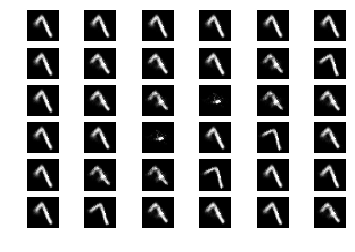

In [19]:
plotdata(pred_2,6)

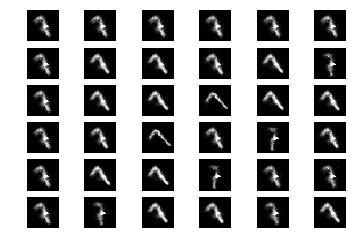

In [20]:
plotdata(pred_3,6)